In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import scanpy as sc
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import scipy.stats as stats
from scipy.stats import spearmanr
from scipy.stats import linregress
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
import statsmodels.api as sm

sc._settings.ScanpyConfig(n_jobs=-1)

In [3]:
# Specify the path to your Helvetica Neue Regular font file
helvetica_neue_path = "/home/mstier/.local/share/fonts/HelveticaNeue-Regular.ttf"

# Create a FontProperties object using the font path
prop_neue = fm.FontProperties(fname=helvetica_neue_path)

# Get the font name from FontProperties
helvetica_neue_name = prop_neue.get_name()

# Define custom context for font sizes and line thickness using Seaborn
custom_context = {
    'font.size': 7,                    # General font size for the plot
    'axes.labelsize': 7,               # Font size for axis labels
    'axes.titlesize': 7,               # Font size for titles
    'legend.fontsize': 7,              # Font size for legend
    'axes.linewidth': 0.6,             # Line width for axes spines
    'grid.linewidth': 0.6,             # Line width for grid lines
    'lines.linewidth': 0.6,            # Line width for plot lines
    'lines.markersize': 3,             # Size of markers in scatter/line plots
    'patch.linewidth': 0.6,            # Line width for boxplot edges
    'xtick.major.size': 3,             # Length of major ticks on x-axis
    'ytick.major.size': 3,             # Length of major ticks on y-axis
    'xtick.labelsize': 7,              # Font size for x-tick labels
    'ytick.labelsize': 7,              # Font size for y-tick labels
    'legend.title_fontsize': 7,        # Font size for legend title
}

# Define custom style for aesthetic elements like background, grid, and spines using Seaborn
custom_style = {
    'axes.facecolor': 'white',         # Background color of the axes
    'axes.edgecolor': 'black',         # Color of the border around the plot
    'axes.grid': False,                # Disable gridlines
    'grid.color': '#EAEAEA',           # Color of grid lines
    'grid.linestyle': '--',            # Style of the grid lines (dashed)
    'xtick.color': 'black',            # Color of x-axis tick labels
    'ytick.color': 'black',            # Color of y-axis tick labels
    'ytick.left': True,
    'xtick.bottom': True,
    'xtick.direction': 'out',          # Direction of x-axis ticks
    'ytick.direction': 'out',          # Direction of y-axis ticks
    'axes.spines.left': True,          # Show the left spine (border)
    'axes.spines.bottom': True,        # Show the bottom spine (border)
    'axes.spines.right': False,        # Hide the right spine
    'axes.spines.top': False,          # Hide the top spine
}

# Use set_theme and pass rc with font settings
sns.set_theme(
    context=custom_context,
    style=custom_style,
    rc={
        'font.family': 'sans-serif',                   # Set family to sans-serif
        'font.sans-serif': [helvetica_neue_name],      # Specify Helvetica Neue as the sans-serif font
        'font.size': 7,                                # General font size for the plot
        'axes.labelsize': 7,                           # Font size for axis labels
        'axes.titlesize': 7,                           # Font size for titles
        'legend.fontsize': 7,                          # Font size for legend
        'xtick.labelsize': 7,                          # Font size for x-tick labels
        'ytick.labelsize': 7                           # Font size for y-tick labels
    }
)

plt.rcParams['svg.fonttype'] = 'none'

In [4]:
# Set the base output directory for all figures
output_dir = '/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/Figure6/'

# Read the CSV file into a DataFrame
df = pd.read_csv('/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/Figure6/correlations_scenith_treg.csv')
columns_to_keep = ['SampleID', 'Group', 'glyco_cap', 'mfi_puro', 'sofa', 'apache', 'nee', 'pf', 'sf', 'lactate', 'mortality', 'los_icu', 'los_hosp', 'sex', 'age_enrollment', 'ph']
filtered_df = df[columns_to_keep]
print(filtered_df)

    SampleID   Group  glyco_cap  mfi_puro  sofa  apache    nee     pf   sf  \
0   V-0018-2  CI-Sep       61.7      44.2     8      16  0.337  448.0  250   
1   V-0019-2   CI-NS       46.2      37.5     7      22  0.151    NaN  109   
2   V-0020-2   CI-NS       53.2      24.5     2      16  0.000  300.0  184   
3   V-0021-2  CI-Sep       75.0      26.3    13      34  0.054  338.0  457   
4   V-0022-2   CI-NS       53.6      33.7     8      15  0.062  219.0  244   
5   V-0023-2   CI-NS       22.0      27.3     3       3  0.000    NaN  123   
6   V-0025-2  CI-Sep       53.9      28.9     6      21  0.413  471.0  462   
7   V-0026-2   CI-NS       66.4      25.4    10      31  0.000  341.0  256   
8   V-0027-2  CI-Sep       79.6      36.9     7      27  0.085    NaN  240   
9   V-0029-2   CI-NS       45.9      22.0     1      14  0.000    NaN  363   
10  V-0031-2   CI-NS       30.1      24.7     2      18  0.000  203.0  243   
11  V-0032-2   CI-NS       61.6      32.4    11      16  0.470  

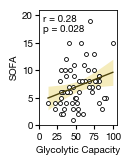

In [20]:
# Plot for SOFA
x_column = 'glyco_cap'
y_column = 'sofa'

# Filter out rows with NaN in 'glyco_cap' or 'sofa'
df_filtered = df[[x_column, y_column]].dropna()

# Plotting
plt.figure(figsize=(1, 1.5))

# Compute Spearman's correlation
correlation, p_value = spearmanr(df_filtered[x_column], df_filtered[y_column])

# Fit a linear regression model using statsmodels
X = sm.add_constant(df_filtered[x_column])
model = sm.OLS(df_filtered[y_column], X).fit()

# Generate regression line
x_vals = np.linspace(df_filtered[x_column].min(), df_filtered[x_column].max(), 100)
X_vals = sm.add_constant(x_vals)
y_vals = model.predict(X_vals)

# Calculate the confidence interval
predictions = model.get_prediction(X_vals)
ci_lower, ci_upper = predictions.conf_int().T

# Plot the confidence interval
plt.fill_between(x_vals, ci_lower, ci_upper, color='#DEC123', alpha=0.3, linewidth=0)

# Plot the regression line
plt.plot(x_vals, y_vals, color='#4E440C', linewidth=1)

# Scatter plot using Seaborn
sns.scatterplot(x=x_column, y=y_column, data=df_filtered, s=8, edgecolor='black', linewidth=0.6, facecolor='white')

# Set axis limits and custom ticks
plt.xlim(0, 105)
plt.ylim(0, 21)
plt.xticks([0, 25, 50, 75, 100])
plt.yticks([0, 5, 10, 15, 20])

# Adjust tick label padding
plt.gca().tick_params(axis='x', pad=2.5)
plt.gca().tick_params(axis='y', pad=1.5)

# Setting labels
plt.xlabel('Glycolytic Capacity', labelpad=3)
plt.ylabel('SOFA', labelpad=2)

# Overlay the correlation and p-value
plt.text(0.05, 0.96, f"r = {correlation:.2f}\np = {p_value:.3f}", transform=plt.gca().transAxes, 
         verticalalignment='top', horizontalalignment='left',
         bbox=dict(facecolor='white', alpha=0, edgecolor='none'))

# Make plot outline square including top and right bars
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)

# Save the figure
output_path = os.path.join(output_dir, 'sofa_vs_glycocap.svg')
plt.savefig(output_path)

# Show the figure
plt.show()

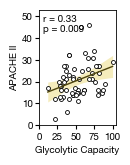

In [21]:
# Plot for APACHE II
x_column = 'glyco_cap'
y_column = 'apache'

# Filter out rows with NaN in 'glyco_cap' or 'apache'
df_filtered = df[[x_column, y_column]].dropna()

# Plotting
plt.figure(figsize=(1, 1.5))

# Compute Spearman's correlation
correlation, p_value = spearmanr(df_filtered[x_column], df_filtered[y_column])

# Fit a linear regression model using statsmodels
X = sm.add_constant(df_filtered[x_column])
model = sm.OLS(df_filtered[y_column], X).fit()

# Generate regression line
x_vals = np.linspace(df_filtered[x_column].min(), df_filtered[x_column].max(), 100)
X_vals = sm.add_constant(x_vals)
y_vals = model.predict(X_vals)

# Calculate the confidence interval
predictions = model.get_prediction(X_vals)
ci_lower, ci_upper = predictions.conf_int().T

# Plot the confidence interval
plt.fill_between(x_vals, ci_lower, ci_upper, color='#DEC123', alpha=0.3, linewidth=0)

# Plot the regression line
plt.plot(x_vals, y_vals, color='#4E440C', linewidth=1)

# Scatter plot using Seaborn
sns.scatterplot(x=x_column, y=y_column, data=df_filtered, s=8, edgecolor='black', linewidth=0.6, facecolor='white')

# Set axis limits and custom ticks
plt.xlim(0, 105)
plt.ylim(0, 53)
plt.xticks([0, 25, 50, 75, 100])
plt.yticks([0, 10, 20, 30, 40, 50])

# Adjust tick label padding
plt.gca().tick_params(axis='x', pad=2.5)
plt.gca().tick_params(axis='y', pad=1.5)

# Setting labels
plt.xlabel('Glycolytic Capacity', labelpad=3)
plt.ylabel('APACHE II', labelpad=2)

# Overlay the correlation and p-value
plt.text(0.05, 0.96, f"r = {correlation:.2f}\np = {p_value:.3f}", transform=plt.gca().transAxes, 
         verticalalignment='top', horizontalalignment='left',
         bbox=dict(facecolor='white', alpha=0, edgecolor='none'))

# Make plot outline square including top and right bars
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)

# Save the figure
output_path = os.path.join(output_dir, 'apache_vs_glycocap.svg')
plt.savefig(output_path)

# Show the figure
plt.show()

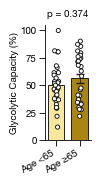

In [36]:
# Define age groups based on <65 and >=65
under_65 = filtered_df[filtered_df['age_enrollment'] < 65]
over_or_equal_65 = filtered_df[filtered_df['age_enrollment'] >= 65]

# Combine the data for plotting (Under 65 vs. 65 and Over)
df_age_enrollment_plot = under_65.assign(group='Age <65').append(
    over_or_equal_65.assign(group='Age ≥65')
)

# Perform Mann-Whitney U test between the two groups
u_stat, p_value = mannwhitneyu(
    df_age_enrollment_plot[df_age_enrollment_plot['group'] == 'Age <65']['glyco_cap'],
    df_age_enrollment_plot[df_age_enrollment_plot['group'] == 'Age ≥65']['glyco_cap']
)

# Set up plot dimensions (0.75 x 1.5 inches)
fig, ax = plt.subplots(figsize=(0.6, 1.5))

# Colors for bars: lighter yellow and dark yellow
light_yellow = '#F8E79C'  # Lighter yellow
dark_yellow = '#A88611'   # Darker yellow

# Manually set bar positions closer together
bar_width = 0.7  # Set desired bar width
groups = df_age_enrollment_plot['group'].unique()
x_positions = np.arange(len(groups))  # Custom x-tick positions to reduce space

# Means and SEMs for each group
means = df_age_enrollment_plot.groupby('group')['glyco_cap'].mean().reindex(groups)
sems = df_age_enrollment_plot.groupby('group')['glyco_cap'].sem().reindex(groups)

# Plot bars at the custom x-tick positions
ax.bar(x_positions, means, yerr=sems, color=[light_yellow, dark_yellow], 
       edgecolor='black', width=bar_width, capsize=3, error_kw={'elinewidth': 0.6})

# Overlay individual points using strip plot
sns.stripplot(
    x='group', y='glyco_cap', data=df_age_enrollment_plot, 
    jitter=True, marker='o', size=3, color='white', 
    edgecolor='black', linewidth=0.6, ax=ax
)

# Adjust x-ticks to match new positions
ax.set_xticks(x_positions)
ax.set_xticklabels(groups, rotation=30, ha='right')

# Set axis limits (0 to 100 for y-axis)
ax.set_ylim(0, 105)
ax.set_xlabel('')
ax.set_ylabel('Glycolytic Capacity (%)', labelpad=1)

# Customize tick parameters to display ticks on the outside
ax.tick_params(axis='y', direction='out', length=4, width=0.6, colors='black', pad=2)
ax.tick_params(axis='x', direction='out', length=4, width=0.6, colors='black', pad=2)

# Set title with Mann-Whitney U test p-value
ax.set_title(f'p = {p_value:.3f}')

# Save the figure
output_path = os.path.join(output_dir, 'age65_vs_glycocap.svg')
plt.savefig(output_path)

# Show the figure
plt.show()

In [37]:
# Calculate median and IQR for each group
stats_age = df_age_enrollment_plot.groupby('group')['age_enrollment'].agg(
    median='median',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Display the results for inclusion in the figure legend
for _, row in stats_age.iterrows():
    group = row['group']
    median = row['median']
    q1 = row['q1']
    q3 = row['q3']
    print(f"{group}: Median = {int(median)}, IQR = ({int(q1)} - {int(q3)})")

Age <65: Median = 55, IQR = (47 - 60)
Age ≥65: Median = 71, IQR = (68 - 78)


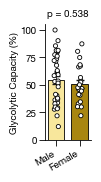

In [7]:
# Define sex groups based on 1 = male and 2 = female
male_group = filtered_df[filtered_df['sex'] == 1]
female_group = filtered_df[filtered_df['sex'] == 2]

# Combine the data for plotting (Male vs. Female)
df_sex_plot = male_group.assign(group='Male').append(
    female_group.assign(group='Female')
)

# Perform Mann-Whitney U test between the two groups
u_stat, p_value = mannwhitneyu(
    df_sex_plot[df_sex_plot['group'] == 'Male']['glyco_cap'],
    df_sex_plot[df_sex_plot['group'] == 'Female']['glyco_cap']
)

# Set up plot dimensions (0.75 x 1.5 inches)
fig, ax = plt.subplots(figsize=(0.6, 1.5))

# Colors for bars: lighter yellow and dark yellow
light_yellow = '#F8E79C'  # Lighter yellow
dark_yellow = '#A88611'   # Darker yellow

# Manually set bar positions closer together
bar_width = 0.7  # Set desired bar width
groups = df_sex_plot['group'].unique()
x_positions = np.arange(len(groups))  # Custom x-tick positions to reduce space

# Means and SEMs for each group
means = df_sex_plot.groupby('group')['glyco_cap'].mean().reindex(groups)
sems = df_sex_plot.groupby('group')['glyco_cap'].sem().reindex(groups)

# Plot bars at the custom x-tick positions
ax.bar(x_positions, means, yerr=sems, color=[light_yellow, dark_yellow], 
       edgecolor='black', width=bar_width, capsize=3, error_kw={'elinewidth': 0.6})

# Overlay individual points using strip plot
sns.stripplot(
    x='group', y='glyco_cap', data=df_sex_plot, 
    jitter=True, marker='o', size=3, color='white', 
    edgecolor='black', linewidth=0.6, ax=ax
)

# Adjust x-ticks to match new positions
ax.set_xticks(x_positions)
ax.set_xticklabels(groups, rotation=30, ha='right')

# Set axis limits (0 to 100 for y-axis)
ax.set_ylim(0, 105)
ax.set_xlabel('')
ax.set_ylabel('Glycolytic Capacity (%)', labelpad=1)

# Customize tick parameters to display ticks on the outside
ax.tick_params(axis='y', direction='out', length=4, width=0.6, colors='black', pad=2)
ax.tick_params(axis='x', direction='out', length=4, width=0.6, colors='black', pad=2)

# Set title with Mann-Whitney U test p-value
ax.set_title(f'p = {p_value:.3f}')

# Save the figure
output_path = os.path.join(output_dir, 'sex_vs_glycocap.svg')
plt.savefig(output_path)

# Show the figure
plt.show()

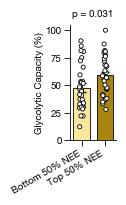

In [17]:
# Calculate quantile for splitting into top and bottom 50%
q1_nee = filtered_df['nee'].quantile(0.50)

# Define groups based on top and bottom 50% of norepinephrine equivalents (nee)
bottom_50_nee = filtered_df[filtered_df['nee'] <= q1_nee]
top_50_nee = filtered_df[filtered_df['nee'] > q1_nee]

# Combine the data for plotting (Bottom 50% vs. Top 50%)
df_nee_plot = bottom_50_nee.assign(group='Bottom 50% NEE').append(
    top_50_nee.assign(group='Top 50% NEE')
)

# Perform Mann-Whitney U test between the two groups
u_stat, p_value = mannwhitneyu(
    df_nee_plot[df_nee_plot['group'] == 'Bottom 50% NEE']['glyco_cap'],
    df_nee_plot[df_nee_plot['group'] == 'Top 50% NEE']['glyco_cap']
)

# Set up plot dimensions (0.75 x 1.5 inches)
fig, ax = plt.subplots(figsize=(0.6, 1.5))

# Colors for bars: lighter yellow and dark yellow
light_yellow = '#F8E79C'  # Lighter yellow
dark_yellow = '#A88611'   # Darker yellow

# Manually set bar positions closer together
bar_width = 0.7  # Set desired bar width
groups = df_nee_plot['group'].unique()
x_positions = np.arange(len(groups))  # Custom x-tick positions to reduce space

# Means and SEMs for each group
means = df_nee_plot.groupby('group')['glyco_cap'].mean().reindex(groups)
sems = df_nee_plot.groupby('group')['glyco_cap'].sem().reindex(groups)

# Plot bars at the custom x-tick positions
ax.bar(x_positions, means, yerr=sems, color=[light_yellow, dark_yellow], 
       edgecolor='black', width=bar_width, capsize=3, error_kw={'elinewidth': 0.6})

# Overlay individual points using strip plot
sns.stripplot(
    x='group', y='glyco_cap', data=df_nee_plot, 
    jitter=True, marker='o', size=3, color='white', 
    edgecolor='black', linewidth=0.6, ax=ax
)

# Adjust x-ticks to match new positions
ax.set_xticks(x_positions)
ax.set_xticklabels(groups, rotation=30, ha='right')

# Set axis limits (0 to 100 for y-axis)
ax.set_ylim(0, 105)
ax.set_xlabel('')
ax.set_ylabel('Glycolytic Capacity (%)', labelpad=1)

# Customize tick parameters to display ticks on the outside
ax.tick_params(axis='y', direction='out', length=4, width=0.6, colors='black', pad=2)
ax.tick_params(axis='x', direction='out', length=4, width=0.6, colors='black', pad=2)

# Set title with Mann-Whitney U test p-value
ax.set_title(f'p = {p_value:.3f}')

# Save the figure
output_path = os.path.join(output_dir, 'nee_vs_glycocap.svg')
plt.savefig(output_path)

# Show the figure
plt.show()

In [21]:
# Calculate median and IQR for each group
stats_nee = df_nee_plot.groupby('group')['nee'].agg(
    median='median',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Display the results for inclusion in the figure legend
for _, row in stats_nee.iterrows():
    group = row['group']
    median = row['median']
    q1 = row['q1']
    q3 = row['q3']
    print(f"{group}: Median = {median:.3f}, IQR = ({q1:.3f} - {q3:.3f})")

Bottom 50% NEE: Median = 0.000, IQR = (0.000 - 0.036)
Top 50% NEE: Median = 0.197, IQR = (0.134 - 0.389)


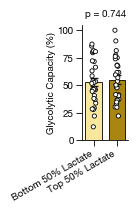

In [22]:
# Calculate quantile for splitting into top and bottom 50% of lactate
q1_lactate = filtered_df['lactate'].quantile(0.50)

# Define groups based on top and bottom 50% of lactate
bottom_50_lactate = filtered_df[filtered_df['lactate'] <= q1_lactate]
top_50_lactate = filtered_df[filtered_df['lactate'] > q1_lactate]

# Combine the data for plotting (Bottom 50% vs. Top 50%)
df_lactate_plot = bottom_50_lactate.assign(group='Bottom 50% Lactate').append(
    top_50_lactate.assign(group='Top 50% Lactate')
)

# Perform Mann-Whitney U test between the two groups
u_stat, p_value = mannwhitneyu(
    df_lactate_plot[df_lactate_plot['group'] == 'Bottom 50% Lactate']['glyco_cap'],
    df_lactate_plot[df_lactate_plot['group'] == 'Top 50% Lactate']['glyco_cap']
)

# Set up plot dimensions (0.75 x 1.5 inches)
fig, ax = plt.subplots(figsize=(0.6, 1.5))

# Colors for bars: lighter yellow and dark yellow
light_yellow = '#F8E79C'  # Lighter yellow
dark_yellow = '#A88611'   # Darker yellow

# Manually set bar positions closer together
bar_width = 0.7  # Set desired bar width
groups = df_lactate_plot['group'].unique()
x_positions = np.arange(len(groups))  # Custom x-tick positions to reduce space

# Means and SEMs for each group
means = df_lactate_plot.groupby('group')['glyco_cap'].mean().reindex(groups)
sems = df_lactate_plot.groupby('group')['glyco_cap'].sem().reindex(groups)

# Plot bars at the custom x-tick positions
ax.bar(x_positions, means, yerr=sems, color=[light_yellow, dark_yellow], 
       edgecolor='black', width=bar_width, capsize=3, error_kw={'elinewidth': 0.6})

# Overlay individual points using strip plot
sns.stripplot(
    x='group', y='glyco_cap', data=df_lactate_plot, 
    jitter=True, marker='o', size=3, color='white', 
    edgecolor='black', linewidth=0.6, ax=ax
)

# Adjust x-ticks to match new positions
ax.set_xticks(x_positions)
ax.set_xticklabels(groups, rotation=30, ha='right')

# Set axis limits (0 to 100 for y-axis)
ax.set_ylim(0, 105)
ax.set_xlabel('')
ax.set_ylabel('Glycolytic Capacity (%)', labelpad=1)

# Customize tick parameters to display ticks on the outside
ax.tick_params(axis='y', direction='out', length=4, width=0.6, colors='black', pad=2)
ax.tick_params(axis='x', direction='out', length=4, width=0.6, colors='black', pad=2)

# Set title with Mann-Whitney U test p-value
ax.set_title(f'p = {p_value:.3f}')

# Save the figure
output_path = os.path.join(output_dir, 'lactate_vs_glycocap.svg')
plt.savefig(output_path)

# Show the figure
plt.show()

In [31]:
# Calculate median and IQR for each group
stats_lactate = df_lactate_plot.groupby('group')['lactate'].agg(
    median='median',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Display the results for inclusion in the figure legend
for _, row in stats_lactate.iterrows():
    group = row['group']
    median = row['median']
    q1 = row['q1']
    q3 = row['q3']
    print(f"{group}: Median = {median:.1f}, IQR = ({q1:.1f} - {q3:.1f})")

Bottom 50% Lactate: Median = 1.6, IQR = (1.1 - 1.8)
Top 50% Lactate: Median = 4.3, IQR = (3.1 - 5.8)


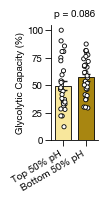

In [33]:
# Calculate quantile for splitting into top and bottom 50% of pH
q1_ph = filtered_df['ph'].quantile(0.50)

# Define groups based on top and bottom 50% of pH
bottom_50_ph = filtered_df[filtered_df['ph'] <= q1_ph]
top_50_ph = filtered_df[filtered_df['ph'] > q1_ph]

# Combine the data for plotting (Top 50% vs. Bottom 50%)
df_ph_plot = top_50_ph.assign(group='Top 50% pH').append(
    bottom_50_ph.assign(group='Bottom 50% pH')
)

# Perform Mann-Whitney U test between the two groups
u_stat, p_value = mannwhitneyu(
    df_ph_plot[df_ph_plot['group'] == 'Top 50% pH']['glyco_cap'],
    df_ph_plot[df_ph_plot['group'] == 'Bottom 50% pH']['glyco_cap']
)

# Set up plot dimensions (0.75 x 1.5 inches)
fig, ax = plt.subplots(figsize=(0.6, 1.5))

# Colors for bars: light yellow for top 50% pH, dark yellow for bottom 50% pH
light_yellow = '#F8E79C'  # Light yellow for top 50% pH
dark_yellow = '#A88611'   # Dark yellow for bottom 50% pH

# Manually set bar positions with top 50% pH on the left
bar_width = 0.7  # Set desired bar width
groups = ['Top 50% pH', 'Bottom 50% pH']  # Custom order for x-axis
x_positions = np.arange(len(groups))  # Custom x-tick positions

# Means and SEMs for each group
means = df_ph_plot.groupby('group')['glyco_cap'].mean().reindex(groups)
sems = df_ph_plot.groupby('group')['glyco_cap'].sem().reindex(groups)

# Plot bars at the custom x-tick positions
ax.bar(x_positions, means, yerr=sems, color=[light_yellow, dark_yellow], 
       edgecolor='black', width=bar_width, capsize=3, error_kw={'elinewidth': 0.6})

# Overlay individual points using strip plot
sns.stripplot(
    x='group', y='glyco_cap', data=df_ph_plot, 
    jitter=True, marker='o', size=3, color='white', 
    edgecolor='black', linewidth=0.6, ax=ax
)

# Adjust x-ticks to match new positions
ax.set_xticks(x_positions)
ax.set_xticklabels(groups, rotation=30, ha='right')

# Set axis limits (0 to 100 for y-axis)
ax.set_ylim(0, 105)
ax.set_xlabel('')
ax.set_ylabel('Glycolytic Capacity (%)', labelpad=1)

# Customize tick parameters to display ticks on the outside
ax.tick_params(axis='y', direction='out', length=4, width=0.6, colors='black', pad=2)
ax.tick_params(axis='x', direction='out', length=4, width=0.6, colors='black', pad=2)

# Set title with Mann-Whitney U test p-value
ax.set_title(f'p = {p_value:.3f}')

# Save the figure
output_path = os.path.join(output_dir, 'ph_vs_glycocap.svg')
plt.savefig(output_path)

# Show the figure
plt.show()

In [34]:
# Calculate median and IQR for each group
stats_ph = df_ph_plot.groupby('group')['ph'].agg(
    median='median',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Display the results for inclusion in the figure legend
for _, row in stats_ph.iterrows():
    group = row['group']
    median = row['median']
    q1 = row['q1']
    q3 = row['q3']
    print(f"{group}: Median = {median:.2f}, IQR = ({q1:.2f} - {q3:.2f})")

Bottom 50% pH: Median = 7.26, IQR = (7.20 - 7.29)
Top 50% pH: Median = 7.40, IQR = (7.37 - 7.44)


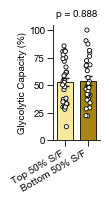

In [24]:
# Calculate quantile for splitting into top and bottom 50% of S/F
q1_sf = filtered_df['sf'].quantile(0.50)

# Define groups based on top and bottom 50% of S/F
bottom_50_sf = filtered_df[filtered_df['sf'] <= q1_sf]
top_50_sf = filtered_df[filtered_df['sf'] > q1_sf]

# Combine the data for plotting (Top 50% vs. Bottom 50%)
df_sf_plot = top_50_sf.assign(group='Top 50% S/F').append(
    bottom_50_sf.assign(group='Bottom 50% S/F')
)

# Perform Mann-Whitney U test between the two groups
u_stat, p_value = mannwhitneyu(
    df_sf_plot[df_sf_plot['group'] == 'Top 50% S/F']['glyco_cap'],
    df_sf_plot[df_sf_plot['group'] == 'Bottom 50% S/F']['glyco_cap']
)

# Set up plot dimensions (0.75 x 1.5 inches)
fig, ax = plt.subplots(figsize=(0.6, 1.5))

# Colors for bars: light yellow for top 50% S/F, dark yellow for bottom 50% S/F
light_yellow = '#F8E79C'  # Light yellow for top 50% S/F
dark_yellow = '#A88611'   # Dark yellow for bottom 50% S/F

# Manually set bar positions with top 50% S/F on the left
bar_width = 0.7  # Set desired bar width
groups = ['Top 50% S/F', 'Bottom 50% S/F']  # Custom order for x-axis
x_positions = np.arange(len(groups))  # Custom x-tick positions

# Means and SEMs for each group
means = df_sf_plot.groupby('group')['glyco_cap'].mean().reindex(groups)
sems = df_sf_plot.groupby('group')['glyco_cap'].sem().reindex(groups)

# Plot bars at the custom x-tick positions
ax.bar(x_positions, means, yerr=sems, color=[light_yellow, dark_yellow], 
       edgecolor='black', width=bar_width, capsize=3, error_kw={'elinewidth': 0.6})

# Overlay individual points using strip plot
sns.stripplot(
    x='group', y='glyco_cap', data=df_sf_plot, 
    jitter=True, marker='o', size=3, color='white', 
    edgecolor='black', linewidth=0.6, ax=ax
)

# Adjust x-ticks to match new positions
ax.set_xticks(x_positions)
ax.set_xticklabels(groups, rotation=30, ha='right')

# Set axis limits (0 to 100 for y-axis)
ax.set_ylim(0, 105)
ax.set_xlabel('')
ax.set_ylabel('Glycolytic Capacity (%)', labelpad=1)

# Customize tick parameters to display ticks on the outside
ax.tick_params(axis='y', direction='out', length=4, width=0.6, colors='black', pad=2)
ax.tick_params(axis='x', direction='out', length=4, width=0.6, colors='black', pad=2)

# Set title with Mann-Whitney U test p-value
ax.set_title(f'p = {p_value:.3f}')

# Save the figure
output_path = os.path.join(output_dir, 'sf_vs_glycocap.svg')
plt.savefig(output_path)

# Show the figure
plt.show()

In [26]:
# Calculate median and IQR for each group
stats_sf = df_sf_plot.groupby('group')['sf'].agg(
    median='median',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Display the results for inclusion in the figure legend
for _, row in stats_sf.iterrows():
    group = row['group']
    median = row['median']
    q1 = row['q1']
    q3 = row['q3']
    print(f"{group}: Median = {int(median)}, IQR = ({int(q1)} - {int(q3)})")

Bottom 50% S/F: Median = 136, IQR = (110 - 176)
Top 50% S/F: Median = 338, IQR = (262 - 433)


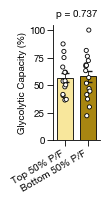

In [28]:
# Remove NaN values from P/F column
filtered_pf = filtered_df.dropna(subset=['pf'])

# Calculate quantile for splitting into top and bottom 50% of P/F
q1_pf = filtered_pf['pf'].quantile(0.50)

# Define groups based on top and bottom 50% of P/F
bottom_50_pf = filtered_pf[filtered_pf['pf'] <= q1_pf]
top_50_pf = filtered_pf[filtered_pf['pf'] > q1_pf]

# Combine the data for plotting (Top 50% vs. Bottom 50%)
df_pf_plot = top_50_pf.assign(group='Top 50% P/F').append(
    bottom_50_pf.assign(group='Bottom 50% P/F')
)

# Perform Mann-Whitney U test between the two groups
u_stat, p_value = mannwhitneyu(
    df_pf_plot[df_pf_plot['group'] == 'Top 50% P/F']['glyco_cap'],
    df_pf_plot[df_pf_plot['group'] == 'Bottom 50% P/F']['glyco_cap']
)

# Set up plot dimensions (0.75 x 1.5 inches)
fig, ax = plt.subplots(figsize=(0.6, 1.5))

# Colors for bars: light yellow for top 50% P/F, dark yellow for bottom 50% P/F
light_yellow = '#F8E79C'  # Light yellow for top 50% P/F
dark_yellow = '#A88611'   # Dark yellow for bottom 50% P/F

# Manually set bar positions with top 50% P/F on the left
bar_width = 0.7  # Set desired bar width
groups = ['Top 50% P/F', 'Bottom 50% P/F']  # Custom order for x-axis
x_positions = np.arange(len(groups))  # Custom x-tick positions

# Means and SEMs for each group
means = df_pf_plot.groupby('group')['glyco_cap'].mean().reindex(groups)
sems = df_pf_plot.groupby('group')['glyco_cap'].sem().reindex(groups)

# Plot bars at the custom x-tick positions
ax.bar(x_positions, means, yerr=sems, color=[light_yellow, dark_yellow], 
       edgecolor='black', width=bar_width, capsize=3, error_kw={'elinewidth': 0.6})

# Overlay individual points using strip plot
sns.stripplot(
    x='group', y='glyco_cap', data=df_pf_plot, 
    jitter=True, marker='o', size=3, color='white', 
    edgecolor='black', linewidth=0.6, ax=ax
)

# Adjust x-ticks to match new positions
ax.set_xticks(x_positions)
ax.set_xticklabels(groups, rotation=30, ha='right')

# Set axis limits (0 to 100 for y-axis)
ax.set_ylim(0, 105)
ax.set_xlabel('')
ax.set_ylabel('Glycolytic Capacity (%)', labelpad=1)

# Customize tick parameters to display ticks on the outside
ax.tick_params(axis='y', direction='out', length=4, width=0.6, colors='black', pad=2)
ax.tick_params(axis='x', direction='out', length=4, width=0.6, colors='black', pad=2)

# Set title with Mann-Whitney U test p-value
ax.set_title(f'p = {p_value:.3f}')

# Save the figure
output_path = os.path.join(output_dir, 'pf_vs_glycocap.svg')
plt.savefig(output_path)

# Show the figure
plt.show()

In [29]:
# Calculate median and IQR for each group
stats_pf = df_pf_plot.groupby('group')['pf'].agg(
    median='median',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Display the results for inclusion in the figure legend
for _, row in stats_pf.iterrows():
    group = row['group']
    median = row['median']
    q1 = row['q1']
    q3 = row['q3']
    print(f"{group}: Median = {int(median)}, IQR = ({int(q1)} - {int(q3)})")

Bottom 50% P/F: Median = 124, IQR = (111 - 146)
Top 50% P/F: Median = 338, IQR = (270 - 382)


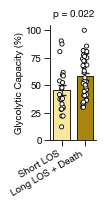

In [13]:
# Define groups for long LOS (including death) and short LOS
short_los_group = filtered_df[(filtered_df['los_hosp'] <= filtered_df['los_hosp'].quantile(0.50)) & (filtered_df['mortality'] == 0)]
long_los_group = filtered_df[(filtered_df['los_hosp'] > filtered_df['los_hosp'].quantile(0.50)) | (filtered_df['mortality'] == 1)]

# Combine the data for plotting (Short LOS vs. Long LOS + Death)
df_los_plot = short_los_group.assign(group='Short LOS').append(
    long_los_group.assign(group='Long LOS + Death')
)

# Perform Mann-Whitney U test between the two groups
u_stat, p_value = mannwhitneyu(
    df_los_plot[df_los_plot['group'] == 'Short LOS']['glyco_cap'],
    df_los_plot[df_los_plot['group'] == 'Long LOS + Death']['glyco_cap']
)

# Set up plot dimensions (0.75 x 1.5 inches)
fig, ax = plt.subplots(figsize=(0.6, 1.5))

# Colors for bars: light yellow for short LOS, dark yellow for long LOS + death
light_yellow = '#F8E79C'  # Light yellow for short LOS
dark_yellow = '#A88611'   # Dark yellow for long LOS + death

# Manually set bar positions with short LOS on the left
bar_width = 0.7  # Set desired bar width
groups = ['Short LOS', 'Long LOS + Death']  # Custom order for x-axis
x_positions = np.arange(len(groups))  # Custom x-tick positions

# Means and SEMs for each group
means = df_los_plot.groupby('group')['glyco_cap'].mean().reindex(groups)
sems = df_los_plot.groupby('group')['glyco_cap'].sem().reindex(groups)

# Plot bars at the custom x-tick positions
ax.bar(x_positions, means, yerr=sems, color=[light_yellow, dark_yellow], 
       edgecolor='black', width=bar_width, capsize=3, error_kw={'elinewidth': 0.6})

# Overlay individual points using strip plot
sns.stripplot(
    x='group', y='glyco_cap', data=df_los_plot, 
    jitter=True, marker='o', size=3, color='white', 
    edgecolor='black', linewidth=0.6, ax=ax
)

# Adjust x-ticks to match new positions
ax.set_xticks(x_positions)
ax.set_xticklabels(groups, rotation=30, ha='right')

# Set axis limits (0 to 100 for y-axis)
ax.set_ylim(0, 105)
ax.set_xlabel('')
ax.set_ylabel('Glycolytic Capacity (%)', labelpad=1)

# Customize tick parameters to display ticks on the outside
ax.tick_params(axis='y', direction='out', length=4, width=0.6, colors='black', pad=2)
ax.tick_params(axis='x', direction='out', length=4, width=0.6, colors='black', pad=2)

# Set title with Mann-Whitney U test p-value
ax.set_title(f'p = {p_value:.3f}')

# Save the figure
output_path = os.path.join(output_dir, 'loshosp_vs_glycocap.svg')
plt.savefig(output_path)

# Show the figure
plt.show()

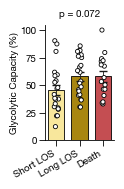

In [8]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kruskal

# Define groups: short LOS, long LOS, and death
short_los_group = filtered_df[(filtered_df['los_hosp'] <= filtered_df['los_hosp'].quantile(0.50)) & (filtered_df['mortality'] == 0)]
long_los_group = filtered_df[(filtered_df['los_hosp'] > filtered_df['los_hosp'].quantile(0.50)) & (filtered_df['mortality'] == 0)]
death_group = filtered_df[filtered_df['mortality'] == 1]

# Combine the data for plotting (Short LOS vs. Long LOS vs. Death)
df_los_plot = short_los_group.assign(group='Short LOS').append(
    long_los_group.assign(group='Long LOS')).append(
    death_group.assign(group='Death')
)

# Perform Kruskal-Wallis test between the groups
kw_stat, p_value = kruskal(
    df_los_plot[df_los_plot['group'] == 'Short LOS']['glyco_cap'],
    df_los_plot[df_los_plot['group'] == 'Long LOS']['glyco_cap'],
    df_los_plot[df_los_plot['group'] == 'Death']['glyco_cap']
)

# Set up plot dimensions (1.5 x 1.5 inches, proportionately wider)
fig, ax = plt.subplots(figsize=(0.9, 1.5))

# Colors for bars: light yellow for short LOS, medium yellow for long LOS, red for death
light_yellow = '#F8E79C'  # Light yellow for short LOS
dark_yellow = '#A88611'   # Dark yellow for long LOS
red_color = '#C44E52'  # Red for death

# Manually set bar positions with short LOS on the left
bar_width = 0.7  # Set desired bar width to maintain same bar appearance
groups = ['Short LOS', 'Long LOS', 'Death']  # Custom order for x-axis
x_positions = np.arange(len(groups))  # Custom x-tick positions

# Means and SEMs for each group
means = df_los_plot.groupby('group')['glyco_cap'].mean().reindex(groups)
sems = df_los_plot.groupby('group')['glyco_cap'].sem().reindex(groups)

# Plot bars at the custom x-tick positions
ax.bar(x_positions, means, yerr=sems, color=[light_yellow, dark_yellow, red_color], 
       edgecolor='black', width=bar_width, capsize=3, error_kw={'elinewidth': 0.6})

# Overlay individual points using strip plot
sns.stripplot(
    x='group', y='glyco_cap', data=df_los_plot, 
    jitter=True, marker='o', size=3, color='white', 
    edgecolor='black', linewidth=0.6, ax=ax
)

# Adjust x-ticks to match new positions
ax.set_xticks(x_positions)
ax.set_xticklabels(groups, rotation=30, ha='right')

# Set axis limits (0 to 100 for y-axis)
ax.set_ylim(0, 105)
ax.set_xlabel('')
ax.set_ylabel('Glycolytic Capacity (%)', labelpad=1)

# Customize tick parameters to display ticks on the outside
ax.tick_params(axis='y', direction='out', length=4, width=0.6, colors='black', pad=2)
ax.tick_params(axis='x', direction='out', length=4, width=0.6, colors='black', pad=2)

# Set title with Kruskal-Wallis test p-value
ax.set_title(f'p = {p_value:.3f}')

# Save the figure
output_path = os.path.join(output_dir, 'loshosp_vs_glycocap_split_death.svg')
plt.savefig(output_path)

# Show the figure
plt.show()

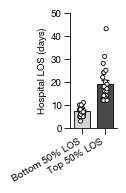

In [9]:
# Calculate quantile for splitting into top and bottom 50% of LOS
q1_los_hosp = filtered_df['los_hosp'].quantile(0.50)

# Define groups based on top and bottom 50% of hospital LOS
bottom_50_los = filtered_df[filtered_df['los_hosp'] <= q1_los_hosp]
top_50_los = filtered_df[filtered_df['los_hosp'] > q1_los_hosp]

# Combine the data for plotting (Top 50% vs. Bottom 50%)
df_los_hosp_plot = bottom_50_los.assign(group='Bottom 50% LOS').append(
    top_50_los.assign(group='Top 50% LOS')
)

# Perform Mann-Whitney U test between the two groups
u_stat, p_value = mannwhitneyu(
    df_los_hosp_plot[df_los_hosp_plot['group'] == 'Bottom 50% LOS']['los_hosp'],
    df_los_hosp_plot[df_los_hosp_plot['group'] == 'Top 50% LOS']['los_hosp']
)

# Set up plot dimensions (1.5 x 1.5 inches)
fig, ax = plt.subplots(figsize=(0.6, 1.5))

# Colors for bars: light yellow for bottom 50% LOS, dark yellow for top 50% LOS
light_yellow = '#D3D3D3'  # Light yellow for bottom 50% LOS
dark_yellow = '#4B4B4B'   # Dark yellow for top 50% LOS

# Manually set bar positions
bar_width = 0.7  # Set desired bar width
groups = ['Bottom 50% LOS', 'Top 50% LOS']  # Custom order for x-axis
x_positions = np.arange(len(groups))  # Custom x-tick positions

# Means and SEMs for each group
means = df_los_hosp_plot.groupby('group')['los_hosp'].mean().reindex(groups)
sems = df_los_hosp_plot.groupby('group')['los_hosp'].sem().reindex(groups)

# Plot bars at the custom x-tick positions
ax.bar(x_positions, means, yerr=sems, color=[light_yellow, dark_yellow], 
       edgecolor='black', width=bar_width, capsize=3, error_kw={'elinewidth': 0.6})

# Overlay individual points using strip plot
sns.stripplot(
    x='group', y='los_hosp', data=df_los_hosp_plot, 
    jitter=True, marker='o', size=3, color='white', 
    edgecolor='black', linewidth=0.6, ax=ax
)

# Adjust x-ticks to match new positions
ax.set_xticks(x_positions)
ax.set_xticklabels(groups, rotation=30, ha='right')

# Set axis limits (0 to max LOS + a bit of buffer for visibility)
ax.set_ylim(0, 50)
ax.set_xlabel('')
ax.set_ylabel('Hospital LOS (days)', labelpad=3)

# Customize tick parameters to display ticks on the outside
ax.tick_params(axis='y', direction='out', length=4, width=0.6, colors='black', pad=2)
ax.tick_params(axis='x', direction='out', length=4, width=0.6, colors='black', pad=2)

# Set title with Mann-Whitney U test p-value
ax.set_title('')

# Save the figure
output_path = os.path.join(output_dir, 'los_hosp_percentiles.svg')
plt.savefig(output_path)

# Show the figure
plt.show()

In [10]:
# Calculate average LOS for each group
avg_los_bottom_50 = bottom_50_los['los_hosp'].mean()
avg_los_top_50 = top_50_los['los_hosp'].mean()

# Print the averages
print(f"Average LOS for Bottom 50%: {avg_los_bottom_50:.2f} days")
print(f"Average LOS for Top 50%: {avg_los_top_50:.2f} days")

Average LOS for Bottom 50%: 7.32 days
Average LOS for Top 50%: 19.00 days


In [30]:
# Calculate median and IQR for each group
stats_los = df_los_hosp_plot.groupby('group')['los_hosp'].agg(
    median='median',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Display the results for inclusion in the figure legend
for _, row in stats_los.iterrows():
    group = row['group']
    median = row['median']
    q1 = row['q1']
    q3 = row['q3']
    print(f"{group}: Median = {int(median)}, IQR = ({int(q1)} - {int(q3)})")

Bottom 50% LOS: Median = 7, IQR = (6 - 8)
Top 50% LOS: Median = 16, IQR = (13 - 23)
